# The Impact of Music on Mental Health

Throughout various stages of life, music has served as a powerful outlet for expressing and managing emotions. During my teenage years, artists like Avril Lavigne and Simple Plan became essential companions, helping me process feelings of angst and uncertainty. Certain genres and artists often resonate with listeners during pivotal moments, offering both comfort and a means of self-expression. 

This project explores how music listening habits, including genre preferences and frequency of listening, relate to mental health outcomes across different age groups and severity levels. Specifically, it investigates how music influences mental health, the correlation between music listening frequency and mental health rankings, and whether people with more severe mental health conditions tend to favor certain genres. Additionally, the analysis examines how these patterns vary by age and seeks to determine if certain genres of music are more impactful in improving mental health outcomes.

<div style="text-align:center">
<img src="https://www.freevector.com/uploads/vector/preview/83591/vecteezyself-care-illustrationas1022_generated.jpg" width=400px height=400px>
</div>


This project will seek to answer the following questions:
* What is the age distribution among the respondents?
* How does genre preference vary across different age groups?
* How much time do the respondents of different ages spend listening to music daily, and is there a correlation between age and hours of listening?
* What is the distribution of mental health rankings, and how does age affect these rankings?
* How does music affect respondents’ mental health?
* Is there a correlation between mental health rankings and the frequency of listening to music?
* How does the number of hours spent listening to music relate to the perceived effects of music on mental health among respondents?
* What is the relationship between music genre preference and mental health outcomes, and do individuals with more severe mental health conditions tend to prefer specific genres?

## Data Source

The data comes from [Music & Mental Health Survey Results](https://www.kaggle.com/datasets/catherinerasgaitis/mxmh-survey-results) posted on Kaggle and is stored as a comma-delimited file (CSV). The survey collects data related to the individuals background, preferred music genres and mental well being, focusing specifically on the following conditions: Anxiety, Depression, Insomnia, and Obsessive-Compulsive Disorder (OCD). 

#### Limitations
Given that the results of this project are self-reported, especially regarding mental health conditions, several factors may affect the accuracy of the findings. Issues such as stigma surrounding mental health, self-diagnosis, and varying levels of personal awareness may influence how respondents report their experiences, potentially shaping the overall conclusions of the study. Furthermore, since no control is in place to prevent individuals from taking the survey more than once, this could also impact the results.

#### Additional Information
Here is some information from the [source](https://www.kaggle.com/datasets/catherinerasgaitis/mxmh-survey-results) regarding the survey:

**Block 0: Background**\
Respondents answer generic questions focused on musical background and listening habits.

**Block 1: Music genres**\
Respondents rank how often they listen to 16 music genres, where they can select:

- Never
- Rarely
- Sometimes
- Very frequently

**Block 2: Mental health**\
Respondents rank Anxiety, Depression, Insomnia, and OCD on a scale of 0 to 10, where:

0 - I do not experience this.\
10 - I experience this regularly, constantly/or to an extreme.

*Additional data that does not fall in these blocks may provide useful background information.*

## Import Python Modules

First, we will import all the python modules/libraries needed for this project.

In [645]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import spearmanr #Spearman correlation
from scipy.stats import chi2_contingency #Chi2

## Data Exploration and Preparation

### Load Data

Next, we can load the data into the `DataFrame` so that the data can be investigated and visualized.

The name of the `DataFrame` will be `mxmh_survey` and we will take a look at the first five records of the DataFrame and perform the intial exploration of the data.

In [649]:
#Load Data into DataFrame
mxmh_survey = pd.read_csv("mxmh_survey_results.csv")
#View 5 records
mxmh_survey.head()

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.


### Initial Exploration

The data has **736** rows and **33** columns. After intial review of the information in each column, here are some of the tasks we can address during the data preparation section of the analysis:
* The *Mental Health Rankings* data contains some non-integer values. Since only a small number of respondents used float values as rankings, we will round these up to the nearest integer to ensure consistency in our analysis.
* *Age* is a critical factor in identifying the individual so we will remove the 1 record with the missing age.
* Additionally, since the goal of our project is to identify how music impacts mental health, the *Music effects* column is crucial. Given that there are only 8 null values in the *Music effects* column, we will treat those records as 'No effect'.

In [652]:
#Rows and Columns
mxmh_survey.shape

(736, 33)

In [653]:
#Info on survey headers
mxmh_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Timestamp                     736 non-null    object 
 1   Age                           735 non-null    float64
 2   Primary streaming service     735 non-null    object 
 3   Hours per day                 736 non-null    float64
 4   While working                 733 non-null    object 
 5   Instrumentalist               732 non-null    object 
 6   Composer                      735 non-null    object 
 7   Fav genre                     736 non-null    object 
 8   Exploratory                   736 non-null    object 
 9   Foreign languages             732 non-null    object 
 10  BPM                           629 non-null    float64
 11  Frequency [Classical]         736 non-null    object 
 12  Frequency [Country]           736 non-null    object 
 13  Frequ

In [654]:
#Get Distinct ranking values and the counts - There are some floats
mxmh_survey[mxmh_survey.columns[27:31]].stack().value_counts()

0.0     516
2.0     321
7.0     311
8.0     269
6.0     266
3.0     260
1.0     246
5.0     227
4.0     221
10.0    166
9.0     135
3.5       3
7.5       1
8.5       1
5.5       1
Name: count, dtype: int64

In [655]:
#Lets take a look at the record with the missing age
mxmh_survey[mxmh_survey.Age.isna()]

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
12,8/27/2022 23:04:00,NaN,Spotify,3.0,Yes,No,No,Hip hop,Yes,Yes,...,Sometimes,Rarely,Rarely,Never,9.0,3.0,2.0,7.0,Improve,I understand.


In [656]:
#Lets take a look at the records missing Music effects info
mxmh_survey[mxmh_survey['Music effects'].isna()]

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
161,8/28/2022 18:59:40,18.0,Other streaming service,2.0,Yes,No,No,K pop,No,Yes,...,Sometimes,Never,Never,Never,0.0,2.0,0.0,0.0,NaN,I understand.
168,8/28/2022 19:16:43,19.0,Spotify,3.0,Yes,Yes,No,K pop,Yes,Yes,...,Sometimes,Rarely,Sometimes,Sometimes,8.0,9.0,6.0,0.0,NaN,I understand.
338,8/29/2022 8:28:46,21.0,YouTube Music,2.0,Yes,No,No,EDM,No,Yes,...,Rarely,Rarely,Sometimes,Very frequently,10.0,10.0,5.0,7.0,NaN,I understand.
441,8/31/2022 18:56:31,21.0,Apple Music,1.5,Yes,Yes,No,Folk,No,No,...,Never,Never,Sometimes,Never,3.0,3.0,1.0,0.0,NaN,I understand.
532,9/2/2022 19:20:33,67.0,I do not use a streaming service.,1.0,No,No,No,Rock,No,No,...,Sometimes,Sometimes,Sometimes,Never,3.0,2.0,2.0,2.0,NaN,I understand.
561,9/4/2022 5:22:34,21.0,Spotify,1.0,NaN,NaN,NaN,K pop,Yes,NaN,...,Sometimes,Sometimes,Very frequently,Rarely,4.0,5.0,2.0,5.0,NaN,I understand.


In [657]:
#What are the distinct responses for Music Effects?
mxmh_survey['Music effects'].unique()

array([nan, 'No effect', 'Improve', 'Worsen'], dtype=object)

### Data Preparation

We will now the prepare the data for analysis.

**First**, we will convert the Mental Health Rankings to integers by rounding them up to the nearest whole number and changing the data type to integer.

In [660]:
# Rounding up and converting to integer for each condition
for col in mxmh_survey.columns[27:31]:
    mxmh_survey[col] = np.ceil(mxmh_survey[col]).astype(int)

#Let's verify
mxmh_survey[mxmh_survey.columns[27:31]].stack().value_counts()

0     516
2     321
7     311
8     270
6     267
3     260
1     246
5     227
4     224
10    166
9     136
Name: count, dtype: int64

**Next**, we will remove the record with no age. `Age` is a key identifier in this survey, as it is one of the few factors that help distinguish individuals. Since there is only one record with missing age data, it can be safely removed. Addtionally, the `Age` variable will be converted to an integer to ensure uniformity throughout the analysis.

In [662]:
#Drop nulls Age values
mxmh_survey.dropna(subset=['Age'],inplace = True)
#verify
mxmh_survey[mxmh_survey.Age.isna()]

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions


In [663]:
#Additional Verification - rows reduced by 1
mxmh_survey.shape

(735, 33)

In [664]:
mxmh_survey['Age'] = mxmh_survey['Age'].astype(int)

#Let's verify
mxmh_survey.Age.dtypes

dtype('int32')

**Last**, we will replace the null values in the `Music effects` column with "No effect".

In [666]:
#Count of all distinct values including nulls
mxmh_survey['Music effects'].value_counts(dropna=False)

Music effects
Improve      541
No effect    169
Worsen        17
NaN            8
Name: count, dtype: int64

In [667]:
#Replace null values with 'No effect'
mxmh_survey.fillna({'Music effects':'No effect'}, inplace=True)

#Count of all distinct values including nulls
mxmh_survey['Music effects'].value_counts(dropna=False)

Music effects
Improve      541
No effect    177
Worsen        17
Name: count, dtype: int64

### Useful Python Functions

Functions used during our analysis to avoid repetitive code. The function below will calculate the spearman correlation coefficient for two variables.

In [670]:
#Function to calculate spearman correlation for any two variables
def corr_stats(var1, var2):
    # Calculate the Spearman correlation coefficient and p-value
    corr, p = spearmanr(mxmh_survey[var1], mxmh_survey[var2])
    # Round the correlation coefficient to 2 decimal places
    corr = np.round(corr, 2)
    # Round the p-value to 4 decimal places
    p = np.round(p, 4)
    # Print the results in a formatted string
    return print("The Spearman correlation between {} and {} was found to be {} (p = {})".format(var1, var2, corr, p))

## Data Analysis

### Summary Statistics

Based on the summary statistics of the <u>numeric</u> data, here are some key observations:
* The `Age` variable appears to be right-skewed, with a maximum age of 89 and the third quartile at 28, indicating 75% of respondents are at or below the age of 28. We will need to asses the distribution of age.
* The `Hours per day` variable contains some unrealistic data, with the maximum value showing 24 hours of music listened per day. This will require further exploration.
* The `BPM` variable contains nonsensical data, with a maximum value of 100,000,000 beats per minute, which is unrealistic. Additionally, our initial exploration shows that much of the data is missing, likely because it is unknown to the respondents. Given this, we will not be including this variable in our analysis going forward.
* The variables signifying mental health rankings all seem to have logical information with values ranging from 0 to 10.

In [674]:
#Summary Stats of numeric values
mxmh_survey.describe(include = np.number)

,Age,Hours per day,BPM,Anxiety,Depression,Insomnia,OCD
count,735.000000,735.000000,6.290000e+02,735.000000,735.000000,735.000000,735.000000
mean,25.206803,3.573537,1.589948e+06,5.834014,4.800000,3.741497,2.632653
std,12.054970,3.030187,3.987261e+07,2.792982,3.029735,3.090128,2.841598
min,10.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,18.000000,2.000000,1.000000e+02,4.000000,2.000000,1.000000,0.000000
50%,21.000000,3.000000,1.200000e+02,6.000000,5.000000,3.000000,2.000000
75%,28.000000,5.000000,1.440000e+02,8.000000,7.000000,6.000000,4.500000
max,89.000000,24.000000,1.000000e+09,10.000000,10.000000,10.000000,10.000000


Based on the summary statistics of the <u>categorical</u> data, here are some key observations:
* More than 50% of the respondents listen to music on *Spotify*.
* Over half of the respondents listen to music *while working*.
* Most of the respondents *do not* play an instrument.
* Most of the respondents *do not* compose music.
* _Rock_ is the most selected `Fav genre`, though only 188 respondents picked it, which might be worth exploring further. Furthermore, there are 16 unique values which tells us that the data in those fields are most likely one of the 16 genres available.
* For most genres, the most frequent response to how often respondents listen is _Never_, except for Classical, Hip Hop, Pop, Rap, and Rock. Additionally, all the columns have only four unique values which means they don't have any values other than the four expected values.
* The most common response for `Music Effects` is *Improve*

In [676]:
#Summary Stats of non-numeric values
mxmh_survey.describe(exclude = np.number)

,Timestamp,Primary streaming service,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,Frequency [Classical],Frequency [Country],...,Frequency [Latin],Frequency [Lofi],Frequency [Metal],Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Music effects,Permissions
count,735,734,732,731,734,735,735,731,735,735,...,735,735,735,735,735,735,735,735,735,735
unique,734,6,2,2,2,16,2,2,4,4,...,4,4,4,4,4,4,4,4,3,1
top,8/28/2022 16:15:08,Spotify,Yes,No,No,Rock,Yes,Yes,Rarely,Never,...,Never,Never,Never,Very frequently,Never,Rarely,Very frequently,Never,Improve,I understand.
freq,2,457,578,496,608,188,524,403,258,342,...,442,280,263,277,225,214,330,235,541,735


### Age Distribution of Respondents

As predicted, the distribution of `Age` among the respondents is highly skewed (skewness > 1) to the right, which could impact the analysis. This may introduce age bias, potentially influencing the overall survey results and our analysis. It might be beneficial to take age into consideration during our analysis.

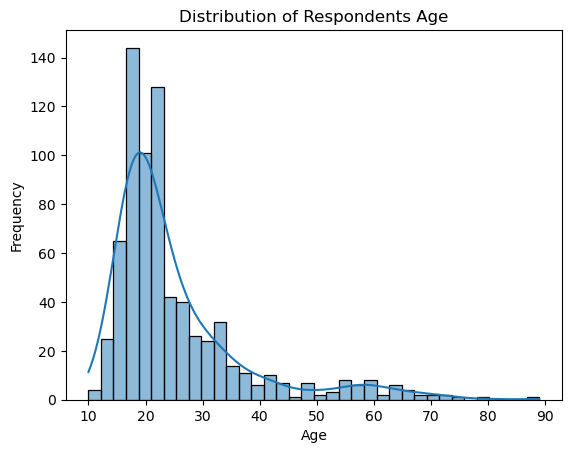

<Figure size 640x480 with 0 Axes>

In [679]:
# Create a histogram to visualize the distribution of respondents' ages
sns.histplot(mxmh_survey.Age, kde=True)  
plt.title('Distribution of Respondents Age') 
plt.xlabel('Age') 
plt.ylabel('Frequency')
plt.show()  
plt.clf()

In [680]:
#Calculate and print skewness
print("The Skewness of the plot: " + str(mxmh_survey.Age.skew()))

The Skewness of the plot: 2.1249225692618467


The *minimum* `Age` is 10 and the *maximum* `Age` is 89. Therefore, the ages are stored into 8 age groups called `Age Groups`. This is done to evaluate the data per age group to limit influence by outliers.
* 10-19: Adolescents/Teens
* 20-29: Twenties
* 30-39: Thirties
* 40-49: Forties
* 50-59: Fifties
* 60-69: Sixties
* 70-79: Seventies
* 80-89: Eighties

In [682]:
#Get the minimum and maximum ages in the survey
np.min(mxmh_survey.Age),np.max(mxmh_survey.Age)

(10, 89)

In [683]:
#Bin boundaries
bins = [10,20,30,40,50,60,70,80,90]

#Labels for the different bins
age_groups = ['Adolescents/Teens', 'Twenties', 'Thirties', 'Forties', 'Fifties','Sixties','Seventies','Eighties']

#Create the bins for the different ages
mxmh_survey['Age Groups'] = pd.cut(mxmh_survey.Age,bins = bins, labels = age_groups)

#Verify bins
mxmh_survey['Age Groups'].value_counts()

Age Groups
Adolescents/Teens    338
Twenties             247
Thirties              76
Forties               26
Fifties               26
Sixties               15
Seventies              5
Eighties               1
Name: count, dtype: int64

### Music Genre Preferences Across Different Age Groups

Since the majority of participants are in their "Teens" and "Twenties", the distribution of preferences is primarily concentrated within that age range. The genre that stands out the most is _Gospel_, which is predominantly favored by respondents in their "Fifties" and "Sixties". _Rock_, the most popular genre overall, is most commonly preferred by individuals in their late "Teens", "Twenties", and early "Thirties", though there are a few outliers in the "Fifties" and "Sixties". Another widely favored genre is _Classical_, preferred by Adolescents/Teens and individuals in their "Twenties" and early "Thirties". The least favored genre is _Latin_, which appears to be preferred mainly by those in their "Teens".

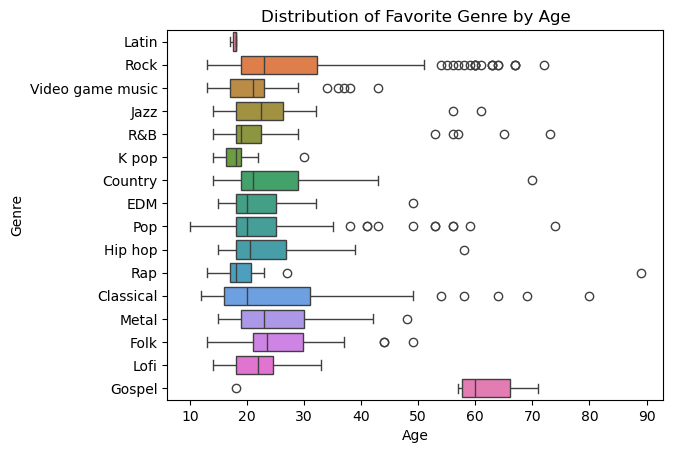

<Figure size 640x480 with 0 Axes>

In [686]:
# Create a boxplot to visualize the distribution of favorite genres by Age
sns.boxplot(data=mxmh_survey, y="Fav genre", x = "Age", hue = "Fav genre")
plt.ylabel('Genre')
plt.title('Distribution of Favorite Genre by Age')
plt.show()
plt.clf()

### Daily Music Listening Habits: Age-Related Trends and Correlations

Most of the respondents listen to music between 2 to 5 hours a day. The average hours spent listening to music for different age groups fall within a reasonable range, except for the "Eighties" group, where the average is 24 hours, which is clearly an outlier. The rest of the groups seem to show a general trend of declining hours as age increases (between 2 and 4 hours), with the exception of the "Fifties" showing a slight rise. The slight rise could be attributed to the outlier at 15 hours as seen in the scatter plot below.  

There is a weak negative correlation (correlation coefficient = -0.14) between age and the number of hours respondents listen to music per day. In other words, as age increases, the average time spent listening to music slightly decreases. Since the p-value (p=0.0001) is less than the typical significance level (0.05), this correlation is statistically significant, meaning there is a meaningful relationship between age and hours per day spent listening to music.

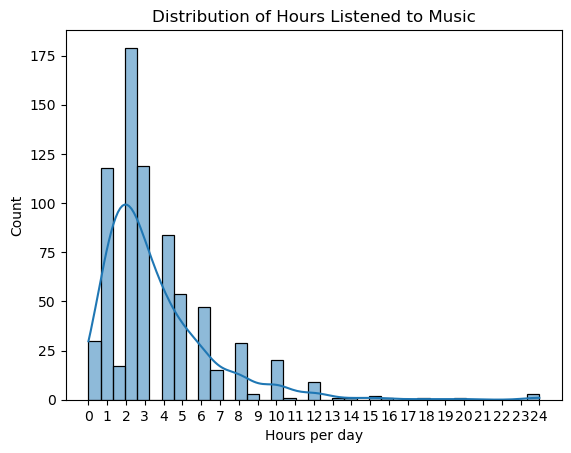

<Figure size 640x480 with 0 Axes>

In [689]:
# Create a histogram to visualize the distribution of hours spent listening to music
sns.histplot(mxmh_survey['Hours per day'], kde=True)
ax=plt.subplot()
plt.title('Distribution of Hours Listened to Music')
ax.set_xticks(range(25))
plt.show()
plt.clf()

In [690]:
#Calculate average hours for each age group
mxmh_survey.groupby(['Age Groups'],observed=False)['Hours per day'].mean().reset_index()

,Age Groups,Hours per day
0,Adolescents/Teens,3.842308
1,Twenties,3.504453
2,Thirties,2.990132
3,Forties,2.201923
4,Fifties,3.519231
5,Sixties,3.133333
6,Seventies,2.650000
7,Eighties,24.000000


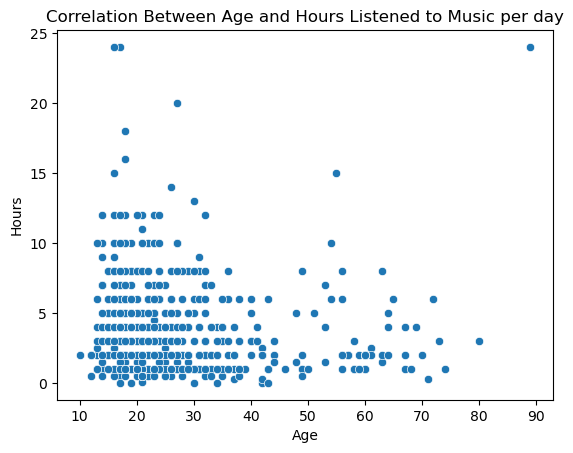

<Figure size 640x480 with 0 Axes>

In [691]:
#Create a scatterplot to visualize the correlation between Age and Hours spent listening to music
sns.scatterplot(mxmh_survey, y='Hours per day', x='Age')
plt.title('Correlation Between Age and Hours Listened to Music per day')
plt.ylabel('Hours')
plt.show()
plt.clf()

In [692]:
#Spearman correlation between age and hours spent listening to music
corr_stats('Age','Hours per day')

The Spearman correlation between Age and Hours per day was found to be -0.14 (p = 0.0001)


### Overall Distribution of Mental Health Rankings

The heatmap below reveals patterns in the distribution of mental health rankings across Anxiety, Depression, Insomnia, and OCD. 

The distribution of `Anxiety` rankings shows an increasing trend as the rank rises, with the highest concentration of respondents reporting anxiety levels between ranks 6 and 8. This suggests that a considerable portion of individuals in the dataset experience moderate to high levels of anxiety, while only a few report anxiety at the extreme ranks of 9-10.

The distribution of `Depression` rankings appears more evenly spread, showing a slight increase in responses at the lower ranks (0-2) and again at the higher ranks (6-8). This indicates a more varied experience of depression among respondents, with fewer individuals reporting extreme levels of depression.

Both `Insomnia` and `OCD` reveal a decreasing trend as the rank increases, with the highest concentration between ranks 0-3. OCD shows a greater concentration at these lower ranks compared to Insomnia, suggesting that mild OCD is more common in the dataset. Additionally, in both cases, fewer individuals reported higher severity for these conditions, indicating that extreme forms of Insomnia and OCD are less frequently experienced.

In [695]:
#Stack the Mental Health Ranking columns and rename appropriately
pivot_data = mxmh_survey[mxmh_survey.columns[27:31]].stack(level=0).reset_index(level=1).set_axis(['Condition','Rank'], axis=1)
#Create a pivot table to summarize counts to be mapped out
mh_pivot = pivot_data.value_counts().reset_index().pivot(index = 'Rank',columns = 'Condition', values = 'count')
#Preview 5 records
mh_pivot.head()

Condition,Anxiety,Depression,Insomnia,OCD
Rank,,,,
0,35,84,149,248
1,29,40,82,95
2,44,93,87,96
3,69,58,68,64
4,56,60,60,48


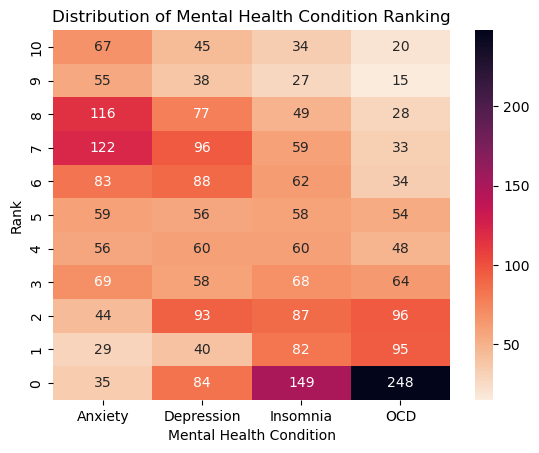

<Figure size 640x480 with 0 Axes>

In [696]:
#Create a heat to visualize the distribution of mental health rankings
ax=plt.subplot()
sns.heatmap(mh_pivot, cmap='rocket_r', annot=True, fmt=".0f")
ax.invert_yaxis() #invert y axis
plt.title('Distribution of Mental Health Condition Ranking')
plt.xlabel('Mental Health Condition')
plt.show()
plt.clf()

### Age-Related Trends in Mental Health Rankings Distribution

`Anxiety` shows a noticeable decline as age increases, with a slight increase in the "Twenties" age group. 

`Depression` also exhibits higher rankings among younger age groups, steadily decreasing with age (similar to Anxiety). However, there is a sharp decline in the "Fifties," followed by an increase in the "Sixties," which may be attributed to a limited sample size in these age categories. 

`Insomnia` displays a curved trend, with the mean ranking peaking in the "Forties." It subsequently drops in the "Fifties" before rising again in the "Sixties," although it generally trends negatively thereafter. Insomnia has the highest average ranking in the "Fifties" age group compared to all other mental health conditions, which deviates from the trend observed in other age groups where Anxiety has the highest average ranking, followed by Depression, Insomnia, and then OCD. 

Similar to Anxiety and Depression, `OCD` ranks higher in younger age groups and steadily decreases with age. 

Additionally, there is no data for the "Eighties" age group, as there was only one respondent, who did not provide rankings for any of the Mental Health conditions.

In [699]:
#Calculate the mean ranking for each of the age groups
age_group_MH_avg = mxmh_survey.groupby('Age Groups', observed=False).agg({
    'Anxiety': 'mean',
    'Depression': 'mean',
    'Insomnia': 'mean',
    'OCD': 'mean'
}).reset_index()
age_group_MH_avg

,Age Groups,Anxiety,Depression,Insomnia,OCD
0,Adolescents/Teens,5.869822,4.523669,3.642012,2.692308
1,Twenties,6.271255,5.574899,3.724696,2.894737
2,Thirties,5.723684,5.000000,4.328947,2.605263
3,Forties,5.500000,4.538462,4.500000,1.846154
4,Fifties,2.730769,2.038462,3.269231,1.461538
5,Sixties,5.400000,3.933333,3.800000,1.333333
6,Seventies,3.400000,2.000000,2.000000,1.000000
7,Eighties,0.000000,0.000000,0.000000,0.000000


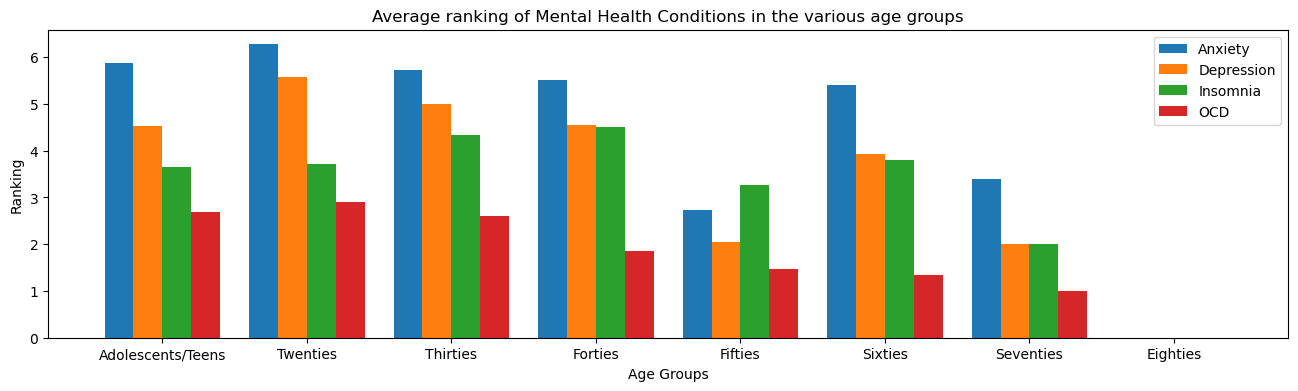

<Figure size 640x480 with 0 Axes>

In [700]:
#Create a side-by-side bar graph to display the means for each age group

#Create lists for the means of each mental health condition
y_Anxiety = age_group_MH_avg.Anxiety.to_list()
y_Depression = age_group_MH_avg.Depression.to_list()
y_Insomnia = age_group_MH_avg.Insomnia.to_list()
y_OCD = age_group_MH_avg.OCD.to_list()

plt.figure(figsize=(16, 4))
#Create a loop
t = 4 # Number of sets of bars/datasets  (4 Mental Health Condition)
d = 8 # Number of groups (8 age groups)
w = 0.8 # Width of each bar

#Calculate the x values for the bar graph
n = 1  # This is our first dataset (out of 4)
x_Anxiety = [t*element + w*n for element
             in range(d)]
plt.bar(x_Anxiety,y_Anxiety, label = "Anxiety")

n = 2  # This is our second dataset (out of 4)
x_Depression = [t*element + w*n for element
             in range(d)]
plt.bar(x_Depression,y_Depression, label = "Depression")

n = 3  # This is our third dataset (out of 4)
x_Insomnia = [t*element + w*n for element
             in range(d)]
plt.bar(x_Insomnia,y_Insomnia, label = "Insomnia")

n = 4  # This is our fourth dataset (out of 4)
x_OCD = [t*element + w*n for element
             in range(d)]
plt.bar(x_OCD,y_OCD, label = "OCD")

#Aesthetics of the bar graph
plt.legend()
x_pos = [(a + b + c + d)/4 for a,b,c,d in zip(x_Anxiety,x_Depression,x_Insomnia,x_OCD)]
plt.xticks(x_pos, age_groups)
plt.title('Average ranking of Mental Health Conditions in the various age groups')
plt.xlabel('Age Groups')
plt.ylabel('Ranking')
plt.show()
plt.clf()

`Anxiety` and `OCD` have a very weak negative correlation with `Age`,  with correlation coefficients of -0.07 and -0.09, respectively. This suggests that as age increases, mental health levels may slightly decline. The p-value for anxiety (p = 0.0581), however, is close to the significance threshold of 0.05, indicating that this finding is not statistically significant. In contrast, the p-value for OCD (p = 0.0132) falls below the significance threshold, indicating a statistically significant finding.

Conversely, `Depression` and `Insominia` have no correlation with `Age` as their correlation coefficients are close to zero at 0.01 and 0.02, respectively. The high p-values for both depression (p = 0.821) and insomnia (p = 0.563) further confirm that there is no significant relationship between these conditions and age.

In [702]:
#Spearman correlation between age and Mental Health Rankings
for col in mxmh_survey.columns[27:31]:
    corr_stats('Age',col)

The Spearman correlation between Age and Anxiety was found to be -0.07 (p = 0.0581)
The Spearman correlation between Age and Depression was found to be 0.01 (p = 0.821)
The Spearman correlation between Age and Insomnia was found to be 0.02 (p = 0.563)
The Spearman correlation between Age and OCD was found to be -0.09 (p = 0.0132)


### Music Effect on Mental Health

Majority of the respondents (73%) reported that music *improves* their mental health, while 24% indicated that music has *no effect* on their mental health, and 2% stated it *worsens* their mental health.

`Music effects` as a variable is a useful identifier for understanding how respondents perceive the impact of music on their mental health, but it is unclear if the rankings were collected before or after the effect of music. If the rankings were collected after respondents listened to music, then the variable can effectively indicate perceived changes in mental health. However, if rankings were taken before any exposure to music, then the variable may not accurately reflect the music's impact.

In [705]:
#Value counts for Music Effect
mxmh_survey['Music effects'].value_counts()

Music effects
Improve      541
No effect    177
Worsen        17
Name: count, dtype: int64

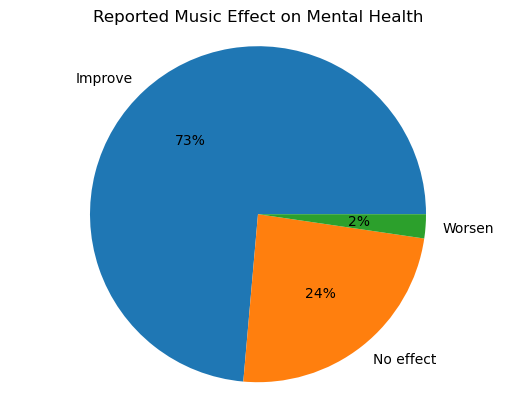

<Figure size 640x480 with 0 Axes>

In [706]:
#Create a pie chart to visualize proportion of music effects on mental health
plt.pie(mxmh_survey['Music effects'].value_counts(),labels = ['Improve','No effect','Worsen'], autopct = '%d%%')
plt.title('Reported Music Effect on Mental Health')
plt.axis('equal')
plt.show()
plt.clf()

### Impact of Music Consumption on Mental Health

All correlations suggest that increased hours of music listening may be associated with higher rankings in these mental health conditions. The Spearman correlation between `Hours per day` and `Anxiety` was found to be 0.09 (p = 0.0106), indicating a weak positive but statistically significant relationship. For `Depression`, the correlation was 0.14 (p = 0.0002), suggesting a moderate positive and statistically significant association. The correlation with `Insomnia` was slightly higher at 0.15 (p = 0.0001), also indicating a moderate positive and statistically significant relationship. Finally, for `OCD`, the correlation was 0.13 (p = 0.0007), reflecting a similar moderate positive and statistically significant association.

Despite the majority of respondents reporting improvements in mental health conditions associated with music listening, the positive correlations with higher rankings in Anxiety, Depression, Insomnia, and OCD suggest that individuals who listen to music more frequently may also face greater challenges related to these conditions. This indicates that while music can enhance mental health for many, there exists a subset of individuals who, despite increased music exposure, continue to struggle with significant mental health issues. These findings highlights the complexity of the relationship between music and mental health, suggesting that individual experiences may vary widely.

In [709]:
#Spearman correlation between hours per day and Mental Health Rankings
for col in mxmh_survey.columns[27:31]:
    corr_stats('Hours per day',col)

The Spearman correlation between Hours per day and Anxiety was found to be 0.09 (p = 0.0106)
The Spearman correlation between Hours per day and Depression was found to be 0.14 (p = 0.0002)
The Spearman correlation between Hours per day and Insomnia was found to be 0.15 (p = 0.0001)
The Spearman correlation between Hours per day and OCD was found to be 0.13 (p = 0.0007)


Mental health rankings were categorized into Mild (0–3), Moderate (4–7), and Severe (8–10) to explore the relationship between hours spent listening to music and its perceived effects.

For `Anxiety`, those with **Mild** anxiety who reported _improvement_ had a median listening time of 3 hours, whereas **Moderate** cases with _worsened_ symptoms also showed a median of 3 hours. In **Severe** cases, both _improvement_ and _no effect_ groups showed a median of 3 hours, while those reporting _worsened_ anxiety listened less, highlighting a complex relationship between music and anxiety.

For `Depression`, listening time increased with severity among those who reported _improvement_, reaching 4 hours in **Severe** cases. **Mild** depression showed a median of 2 hours for both _improvement_ and _no effect_, but only 0.5 hours for _worsened_. This suggests music might play a more supportive role in managing more severe depression.

For `Insomnia`, those reporting _improvement_ listened more as severity increased, with **Severe** cases showing a median of 4 hours. **Mild** cases showed 2 hours for _improvement_, and **Moderate** cases saw 3 hours, though the trend is less clear for mild cases.

For `OCD`, more severe cases corresponded to higher listening times for _improvement_, with **Mild** OCD showing a median of 3 hours, and **Severe** OCD peaking at 4 hours, suggesting that music may be increasingly beneficial as symptoms become more intense.

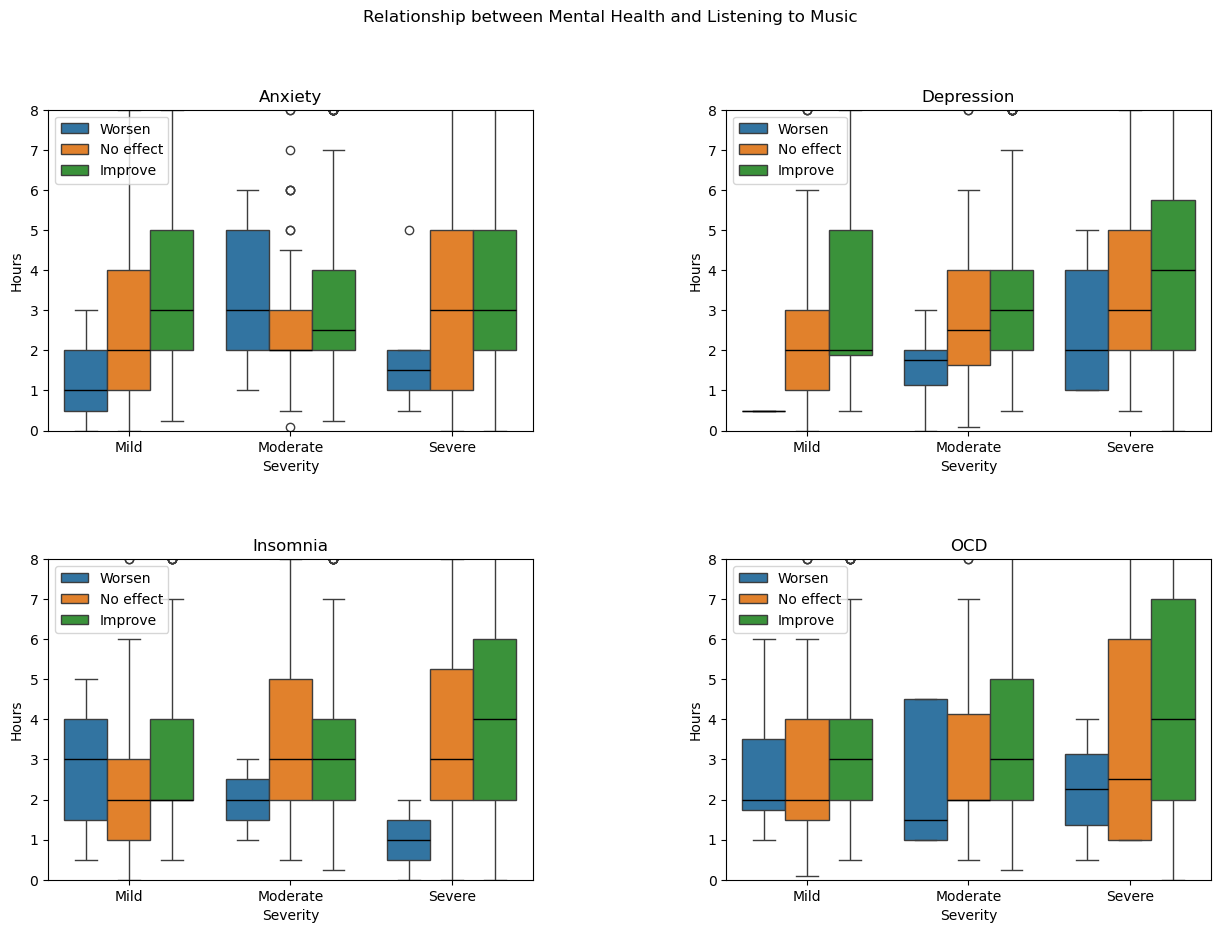

<Figure size 640x480 with 0 Axes>

In [711]:
#Create a box plot to visualize distribution of Mental Health Rankings by Frequency of Music

fig = plt.figure(figsize=(15, 10))
plt.suptitle('Relationship between Mental Health and Listening to Music')

# Loop through the columns of interest
for i, col in enumerate(mxmh_survey.columns[27:31], start=1):
    subset = mxmh_survey[['Hours per day','Music effects',col]].copy()
    subset['Severity'] = pd.cut(mxmh_survey[col], bins=[0, 3, 7, 10], labels=['Mild', 'Moderate', 'Severe']) #categorize Mental health rankings
    plt.subplot(2, 2, i)
    sns.boxplot(data=subset, y="Hours per day", x='Severity', hue = 'Music effects', hue_order = ['Worsen','No effect','Improve']
                ,medianprops=dict(linewidth=1, color='black'))
    plt.ylim(0, 8)
    plt.title(col)  # Use the column name for the title
    plt.ylabel('Hours')
    plt.legend(loc='upper left')

plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.show()
plt.clf()  # Clear the figure after displaying

### Impact of Music Genre Preferences on Mental Health 

The Chi² analysis indicates that `Insomnia` is the only condition with a significant correlation with preferred music genre, with a p-value of 0.0473, which is below the significance threshold of 0.05. In contrast, `Anxiety`, `Depression`, and `OCD` show no statistically significant correlations with preferred music genres, with p-values of 0.082, 0.419, and 0.819, respectively. However, it is essential to recognize that the absence of significant relationships in this analysis does not rule out the possibility of such relationships existing. These values may vary with a larger sample size or different genres.

In [714]:
#Chi2 correaltion

# Loop through the columns of interest
for i, col in enumerate(mxmh_survey.columns[27:31], start=1):
    subset2 = mxmh_survey[['Fav genre',col]].copy()
    subset2['Severity'] = pd.cut(mxmh_survey[col], bins=[0, 3, 7, 10], labels=['Mild', 'Moderate', 'Severe'])

    # Create a contingency table
    contingency_table = pd.crosstab(subset2['Severity'], subset2['Fav genre'])
    print(col + " Contingency Table:\n", contingency_table)

    # Perform Chi-Squared test
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    # Print the results
    print(f"Chi2 Statistic: {chi2}")
    print(f"P-value: {p}")
    print("\n")



Anxiety Contingency Table:
 Fav genre  Classical  Country  EDM  Folk  Gospel  Hip hop  Jazz  K pop  Latin  \
Severity                                                                        
Mild              12        5    5     2       3        8     5      2      1   
Moderate          24       10   14    11       2       16     7     14      0   
Severe            11        8   13    15       1       10     7      9      1   

Fav genre  Lofi  Metal  Pop  R&B  Rap  Rock  Video game music  
Severity                                                       
Mild          2     18   19   14    7    33                 6  
Moderate      6     37   61   13   10    71                24  
Severe        2     29   32    8    4    75                13  
Chi2 Statistic: 41.27741556841326
P-value: 0.08239898646346348


Depression Contingency Table:
 Fav genre  Classical  Country  EDM  Folk  Gospel  Hip hop  Jazz  K pop  Latin  \
Severity                                                             

**Rock**, **Pop**, and **Metal** emerge as the three most favored genres across mental health conditions, while other genres show lower preference percentages.

For respondents with `Anxiety`, Rock is the leading genre, with its popularity increasing as severity rises. Pop sees a spike in popularity in moderate cases but levels off in mild and severe cases. Metal is consistently preferred across all severity levels.

For those with `Depression`, Rock dominates again, maintaining consistency in mild and moderate cases, but increasing in severe cases. Pop remains stable in mild and moderate cases but drops in severe cases, while Metal gradually increases in popularity with worsening severity.

For `Insomnia`, Rock fluctuates, peaking in moderate cases before decreasing in severe cases, though it continues to be the top choice. Pop steadily declines as severity rises, while Metal shows a significant increase as severity worsens.

For respondents with `OCD`, Rock and Pop both become more popular as severity increases, with Rock leading overall. Metal shows a dip from mild to moderate severity but rises again in severe cases, indicating varied preferences depending on severity.

This analysis highlights that **Rock** is the most consistently favored genre among respondents with various mental health conditions, with its popularity often increasing as the severity of conditions like Anxiety, Depression, and OCD worsens. **Pop** emerges as a secondary preference, with mixed trends: it spikes in moderate Anxiety cases but declines in severe Depression and Insomnia cases. **Metal** shows a stable or rising preference as condition severity worsens, particularly in Depression and Insomnia. People with more severe conditions tend to gravitate toward these three genres, especially Rock.

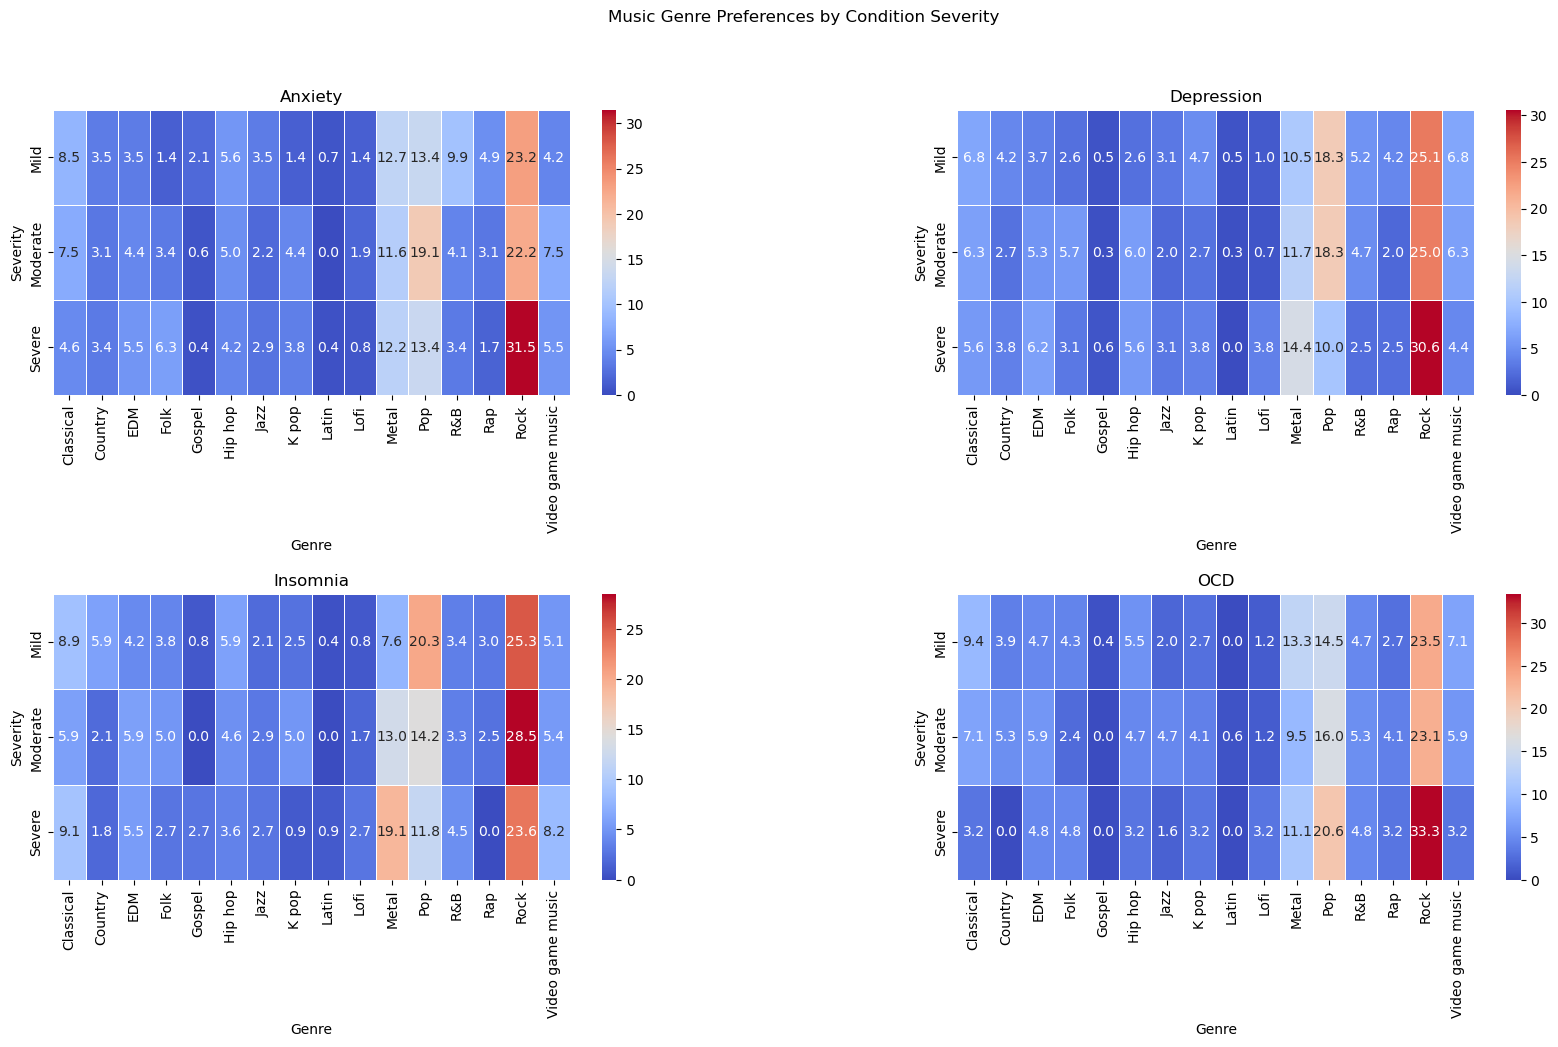

In [716]:
#Create a heatmap to visualize severity of condition with relation to genre

fig = plt.figure(figsize=(20, 10))
plt.suptitle('Music Genre Preferences by Condition Severity')


# Loop through the columns of interest
for i, col in enumerate(mxmh_survey.columns[27:31], start=1):
    subset3 = mxmh_survey[['Fav genre', col]].copy()
    
    # Create Rank Category
    subset3['Severity'] = pd.cut(subset3[col], bins=[0, 3, 7, 10], labels=['Mild', 'Moderate', 'Severe'])

    plt.subplot(2, 2, i)

    # Count occurrences of each genre per severity level
    genre_counts = subset3.groupby(['Severity', 'Fav genre'], observed=False).size().reset_index(name='Count')

    # Pivoting the data for percentage stacked bar chart
    stacked_data = genre_counts.pivot(index='Severity', columns='Fav genre', values='Count').fillna(0)
    
    # Calculate percentage
    percentage_data = stacked_data.div(stacked_data.sum(axis=1), axis=0) * 100


    sns.heatmap(percentage_data, annot=True, fmt=".1f", cmap="coolwarm", linewidths=0.5)

    plt.title(col)
    plt.ylabel('Severity')
    plt.xlabel('Genre')


plt.subplots_adjust(wspace=0.4, hspace=0.7)
plt.show()

## Conclusion

The overall conclusion of this analysis highlights a complex and multifaceted relationship between music listening habits and mental health outcomes.The findings suggest the need for further investigation, particularly with larger sample sizes, to uncover deeper connections between music preferences and mental well-being.

* **What is the age distribution among the respondents?**
  - The age distribution is highly skewed to the right, with a significant concentration of respondents primarily in their teens and twenties.
* **How does genre preference vary across different age groups?**
  - Gospel is predominantly favored by respondents in their fifties and sixties, while Rock, the most popular genre overall, is preferred by those in their late teens, twenties, and early thirties. Classical is also widely favored across younger age groups, while Latin is the least favored, mostly among teens.
* **How much time do the respondents of different ages spend listening to music daily, and is there a correlation between age and hours of listening?**
  - The average number of hours spent listening to music per day across age groups falls between 2 and 4 hours with the exception of the one respondent in their eighties which is clearly an outlier.
  - There is a weak but statistically significant negative correlation between age and the number of hours respondents listen to music per day, indicating that as age increases, the hours spent listening to music per day decreases.
* **What is the distribution of mental health rankings, and how does age affect these rankings?**
  - Anxiety levels in the respondents tend to be moderate to high (ranks 6-8), while Depression shows a even distribution with peaks at both low and high ranks. Insomnia and OCD are primarily mild, particularly OCD, with fewer individuals reporting severe cases.
  - Anxiety, Depression, and OCD generally decline with age, showing a slight increase in the "Twenties". Depression drops sharply in the "Fifties" and rises again in the "Sixties", likely due to sample size. Insomnia follows a curved trend, peaking in the "Forties", dipping in the "Fifties", then rising in the "Sixties", with the highest average ranking in the "Fifties".
  - While there are weak correlations observed between Age and Anxiety, and Age and OCD, only the correlation with OCD is statistically significant. The correlations with Depression and Insomnia show no significant relationship with Age.
* **How does music affect respondents’ mental health?**
  - Most respondents (73%) reported that music improves their mental health, while 24% indicated no effect, and 2% said it worsens their mental health.
  - The "Music effects" variable is valuable for assessing respondents' perceptions of music's impact on mental health, but in this survey, its effectiveness depends on whether the rankings were collected before or after exposure to music.
* **Is there a correlation between mental health rankings and the frequency of listening to music?**
  - The analysis reveals weak to moderate positive correlations between music listening hours and higher mental health condition rankings, with significant Spearman coefficients of 0.09 for Anxiety, 0.14 for Depression, 0.15 for Insomnia, and 0.13 for OCD.
  - While many respondents report improvements in their mental health from music, the correlations indicate that increased music listening may also be associated with greater challenges in managing these conditions, underscoring the complex and varied relationship between music exposure and mental well-being.
* **How does the number of hours spent listening to music relate to the perceived effects of music on mental health among respondents?**
  - Music appears to play a more significant role in managing more severe mental health conditions like depression, insomnia, and OCD, though its effectiveness in managing anxiety is more variable.
* **What is the relationship between music genre preference and mental health outcomes, and do individuals with more severe mental health conditions tend to prefer specific genres?**
  - The Chi² analysis reveals a significant correlation between Insomnia and preferred music genre (p = 0.0473), while no significant correlations were found for Anxiety, Depression, and OCD, suggesting that further investigation with larger sample sizes may uncover potential relationships.
  - Rock and Metal tend to resonate more with individuals experiencing more severe mental health conditions, while Pop's appeal varies depending on the condition and its severity.

## Further Analysis

* A more structured dataset or experiment with objective information about mental health conditions could ensure higher accuracy. This could include clinical diagnoses or assessments rather than self-reported rankings, reducing potential bias and improving the study’s rigor.
* Expanding the sample size, particularly ensuring equal representation across all age groups, would allow for more robust statistical analysis and generalizable conclusions. A larger, more diverse sample could help reveal trends that are currently masked by a limited dataset.
* Collecting additional demographic data—such as race, sex, socioeconomic status, and cultural background—could provide a more comprehensive understanding of how different groups experience the relationship between music and mental health. This would allow for more targeted interventions or insights.
* Including geographical data in future studies could reveal regional differences in music preferences and their effects on mental health. This could also provide insight into how cultural contexts influence music's role in emotional well-being.
* Tracking changes in respondents' mental health over time in relation to their music listening habits. This would help determine if there are links between specific genres, listening frequency, and mental health improvements or deterioration over time.
* Comparing self-reported music listening habits with formal music therapy programs could offer insights into the efficacy of structured music interventions versus casual listening in managing mental health conditions.
* Exploring the context in which respondents listen to music (e.g., while exercising, working, or relaxing) could offer more granular insights into how and why certain types of music impact mental health. While the survey included a column for music listening during work, expanding to other contexts could further enrich the analysis.